In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
titanic = fetch_openml('titanic', version=1)
df = titanic['data']
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB


# Data Cleaning

In [4]:
#Remove duplicates
df = df.drop_duplicates()

In [5]:
#Filling up some columns using median/mode
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [6]:
#Removing the columns which are irrelevant and have very less information
df1 = df.drop(columns = ['cabin', 'boat', 'body', 'home.dest', 'name', 'parch'])

In [7]:
#Removing outliers
numeric_columns = df1.select_dtypes(include=[np.number]).columns
non_numeric_columns = df1.select_dtypes(exclude=[np.number]).columns

Q1 = df1[numeric_columns].quantile(0.25)
Q3 = df1[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df1[numeric_columns] < (Q1 - 1.5 * IQR)) | (df1[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

df_cleaned = df1[~outlier_mask]

In [8]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1025 entries, 5 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1025 non-null   int64   
 1   sex       1025 non-null   category
 2   age       1025 non-null   float64 
 3   sibsp     1025 non-null   int64   
 4   ticket    1025 non-null   object  
 5   fare      1025 non-null   float64 
 6   embarked  1025 non-null   category
dtypes: category(2), float64(2), int64(2), object(1)
memory usage: 50.3+ KB


# Univariate Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df_cleaned.describe())

            pclass          age        sibsp         fare
count  1025.000000  1025.000000  1025.000000  1025.000000
mean      2.473171    28.549268     0.274146    17.100446
std       0.732552     9.309289     0.505792    13.722008
min       1.000000     3.000000     0.000000     0.000000
25%       2.000000    23.000000     0.000000     7.854200
50%       3.000000    28.000000     0.000000    10.516700
75%       3.000000    32.000000     0.000000    24.150000
max       3.000000    54.000000     2.000000    65.000000


In [10]:
#Frequency distributions for categorical variables
print(df_cleaned['sex'].value_counts())
print(df_cleaned['embarked'].value_counts())

sex
male      698
female    327
Name: count, dtype: int64
embarked
S    742
C    173
Q    110
Name: count, dtype: int64


C:\Users\HARSH GOYAL\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


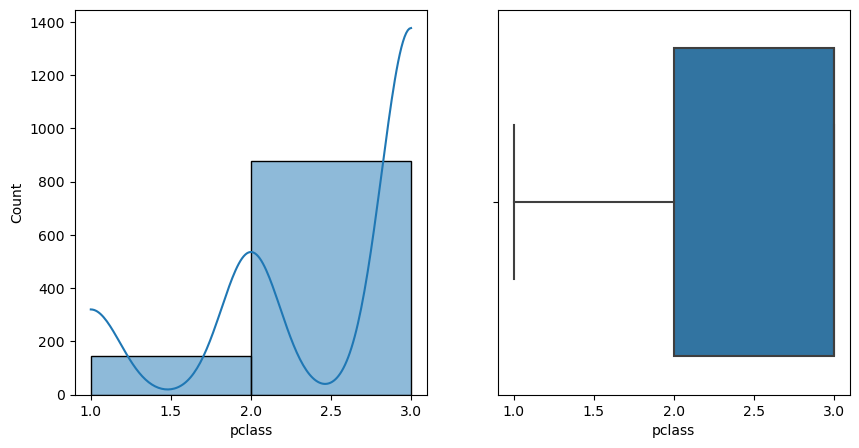

C:\Users\HARSH GOYAL\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


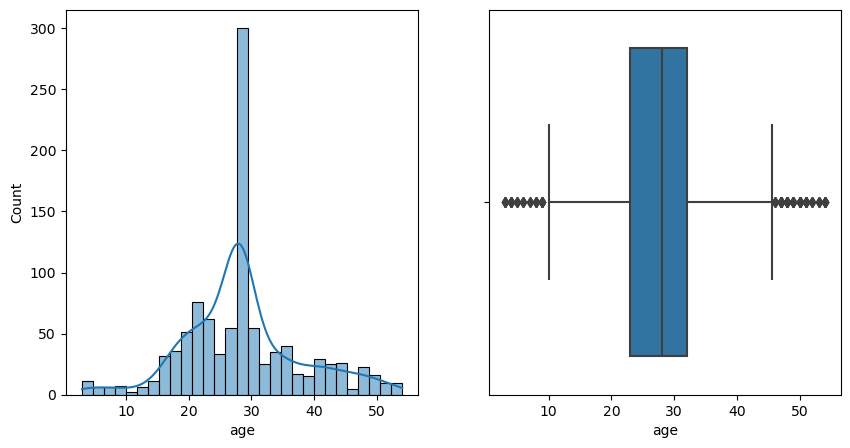

C:\Users\HARSH GOYAL\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


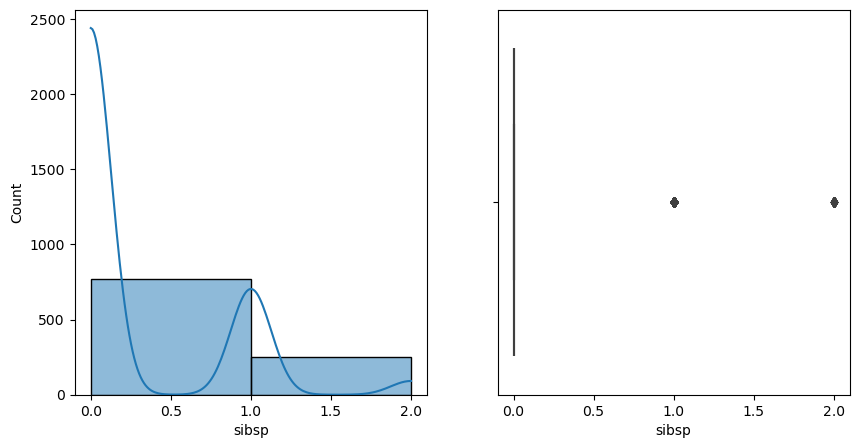

C:\Users\HARSH GOYAL\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


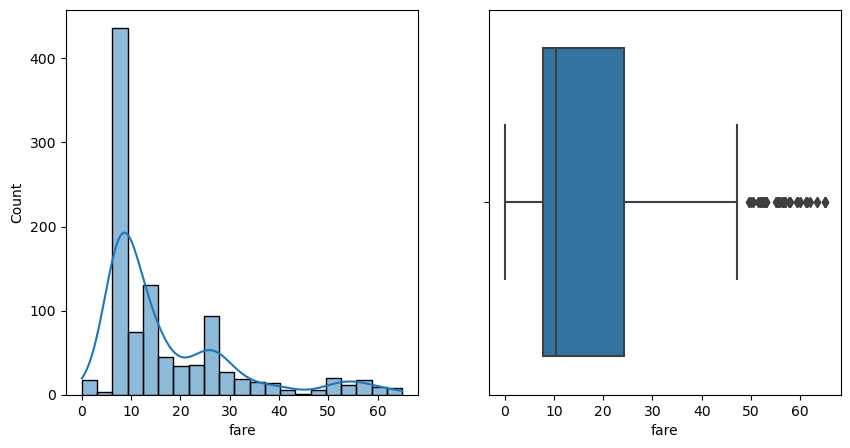

In [11]:
#Histograms and box plots
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col, data=df_cleaned)
    plt.show()

## Bivariate Analysis

In [12]:
print("Correlation matrix :")
print(df_cleaned[numeric_columns].corr())

Correlation matrix :
          pclass       age     sibsp      fare
pclass  1.000000 -0.296482 -0.042068 -0.665489
age    -0.296482  1.000000 -0.057936  0.199491
sibsp  -0.042068 -0.057936  1.000000  0.338837
fare   -0.665489  0.199491  0.338837  1.000000


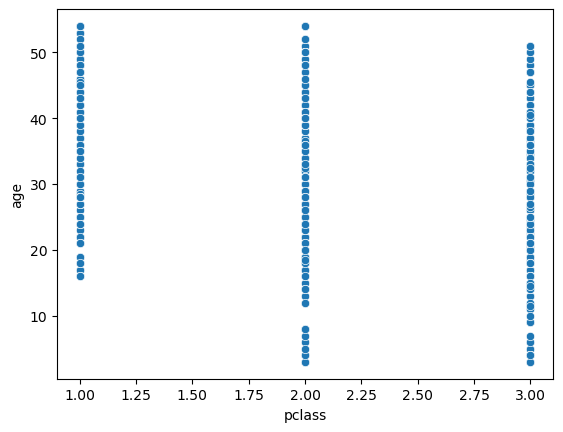

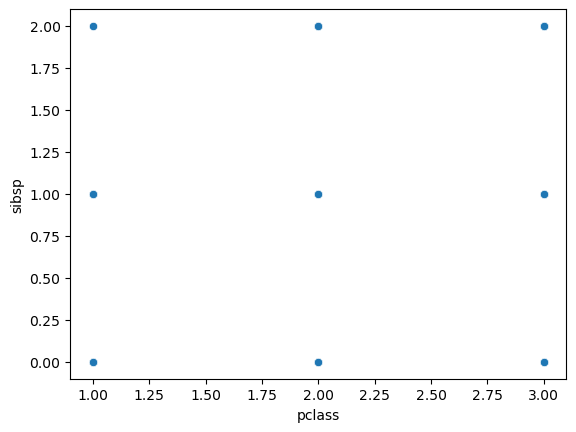

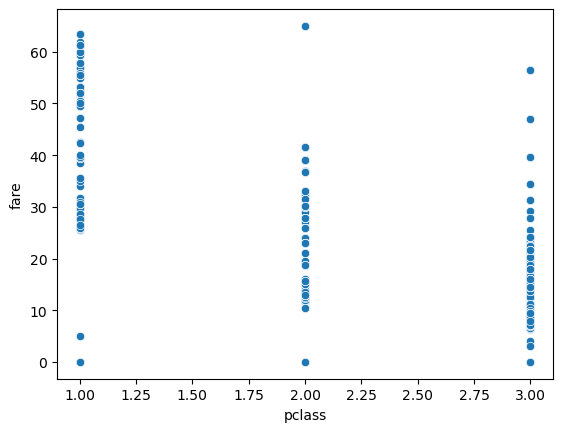

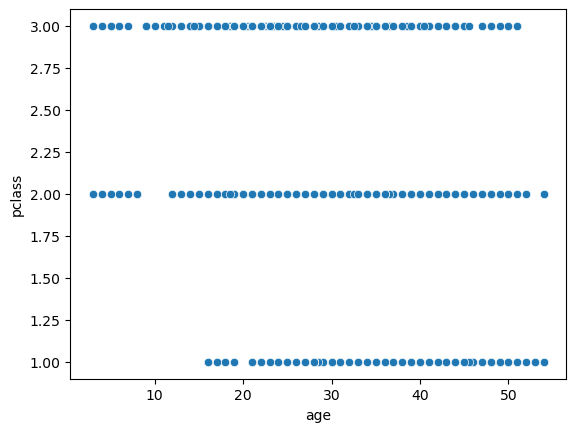

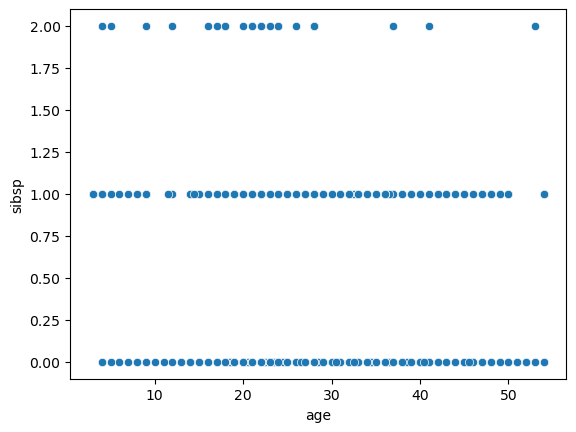

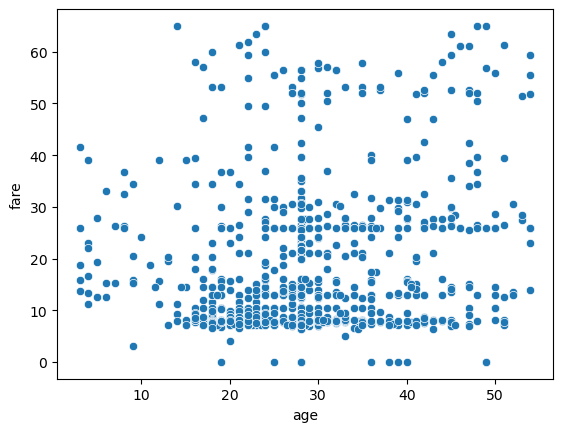

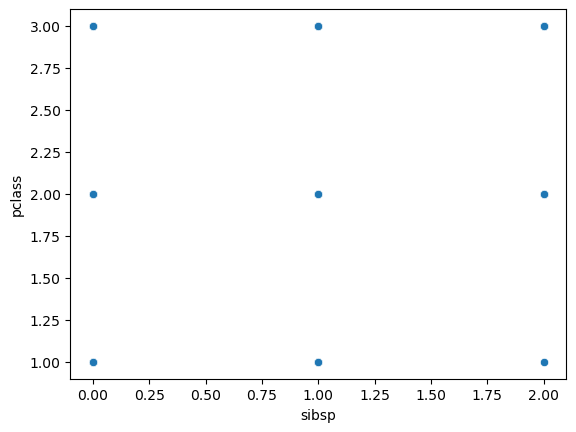

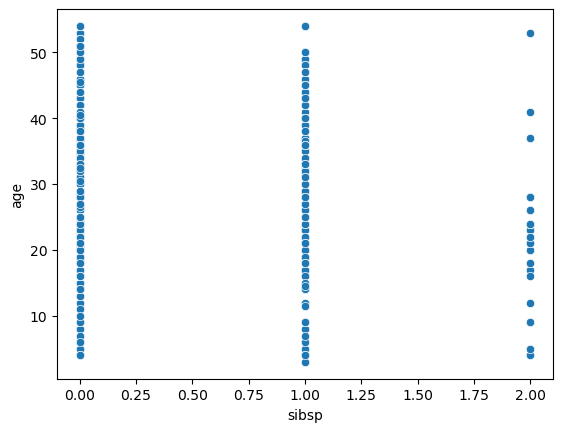

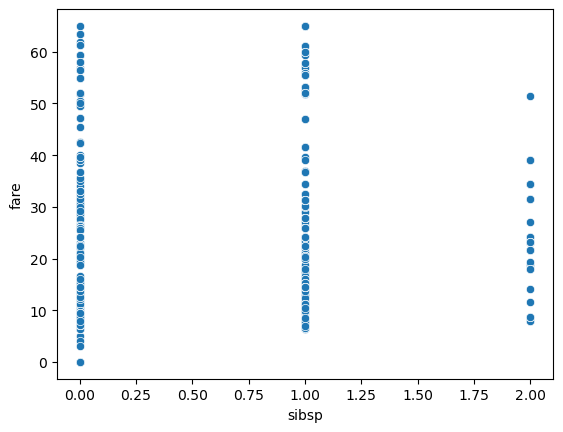

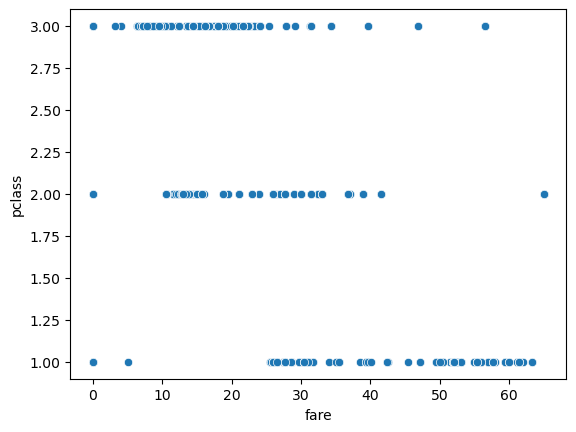

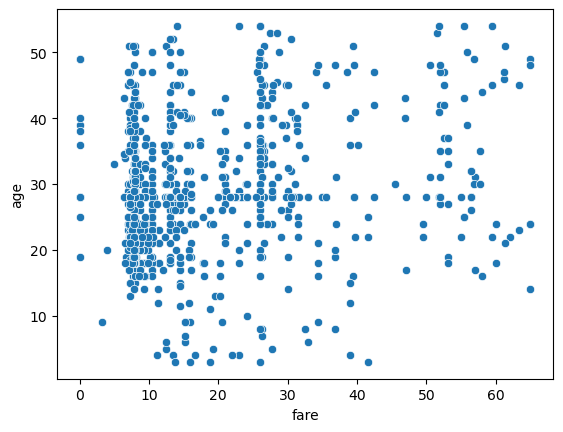

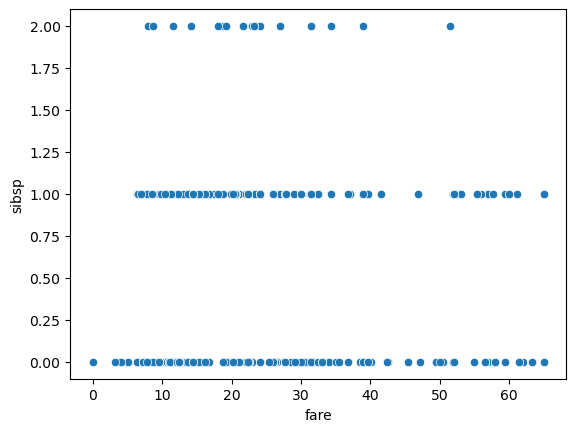

In [13]:
#Scatterplots
for col1 in numeric_columns:
    for col2 in numeric_columns:
        if col1!=col2:
            sns.scatterplot(x=col1, y=col2, data=df_cleaned)
            plt.show()

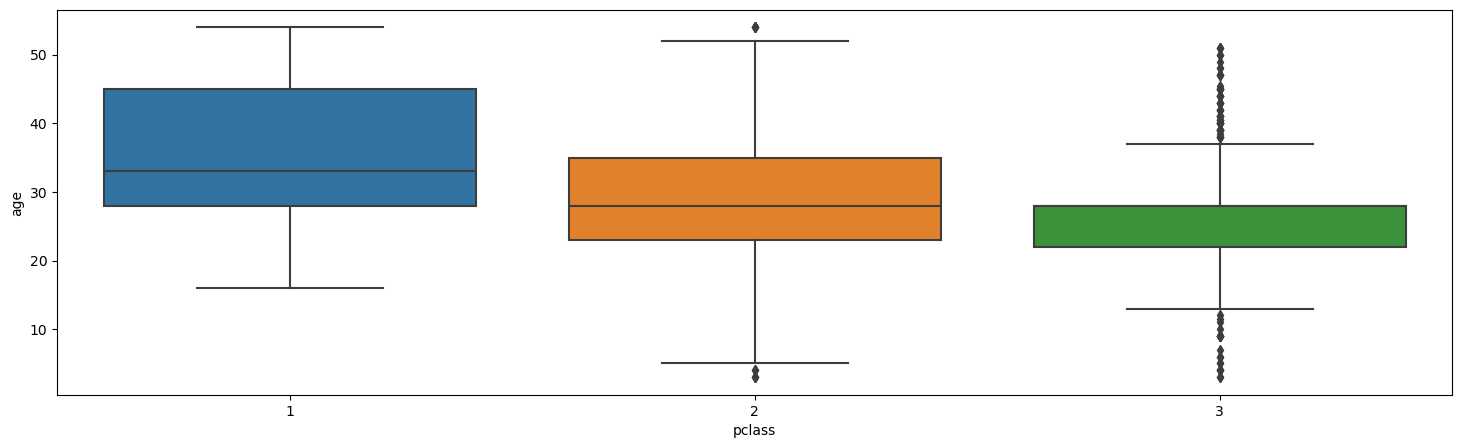

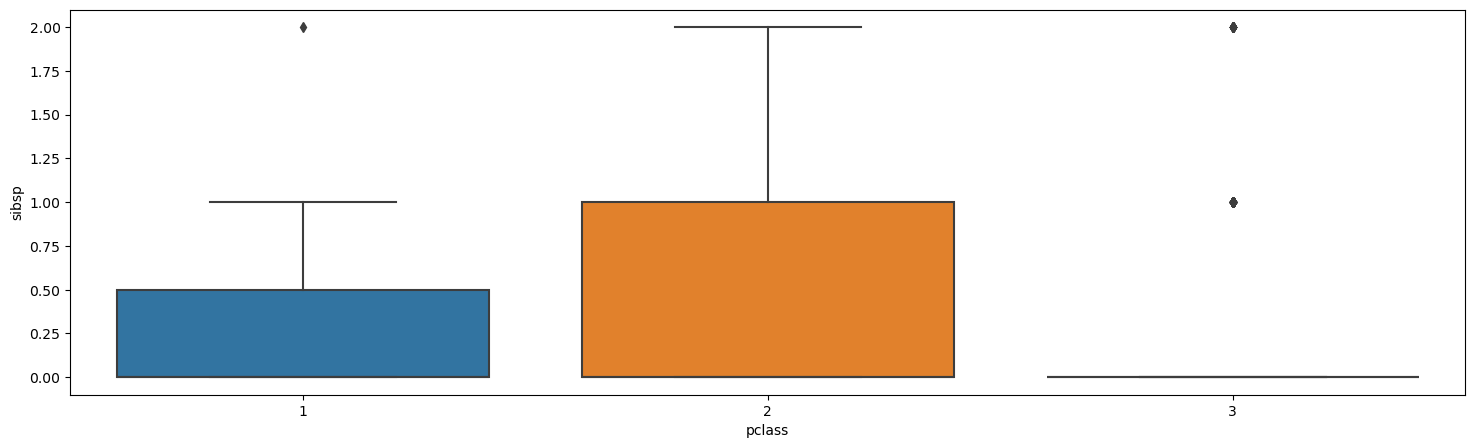

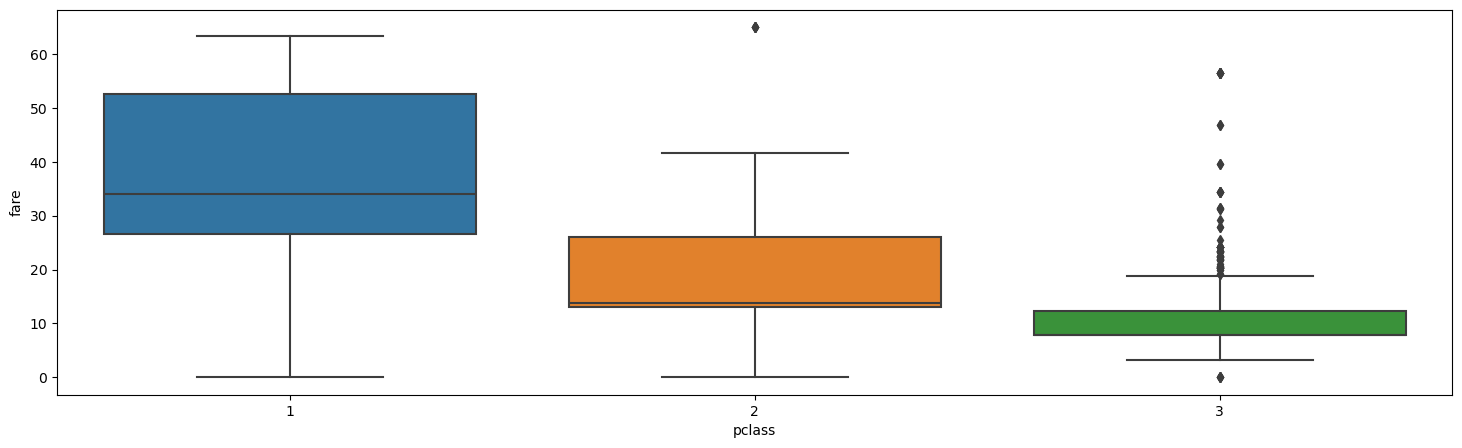

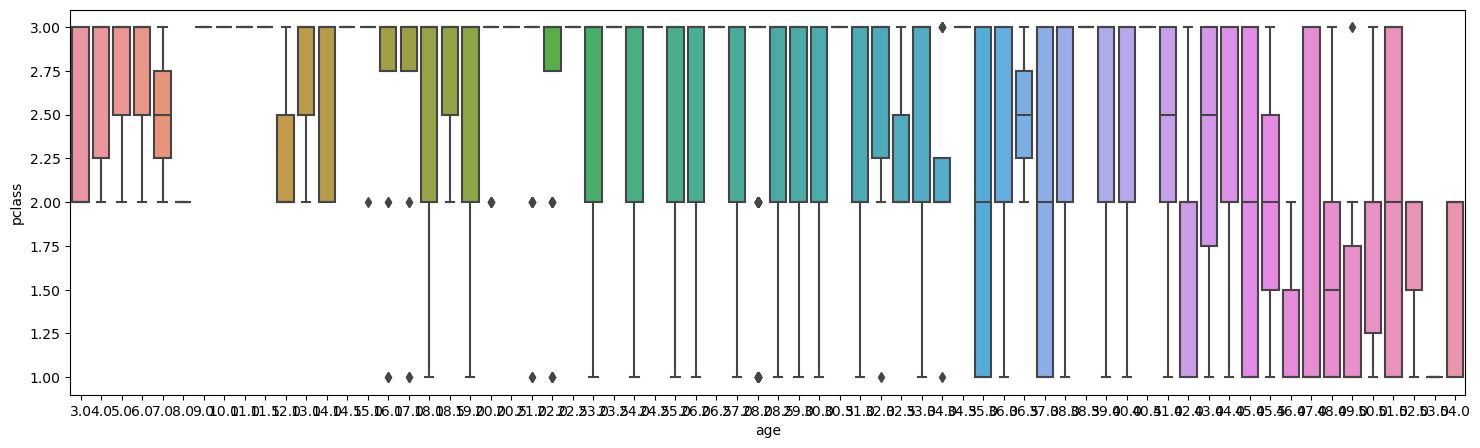

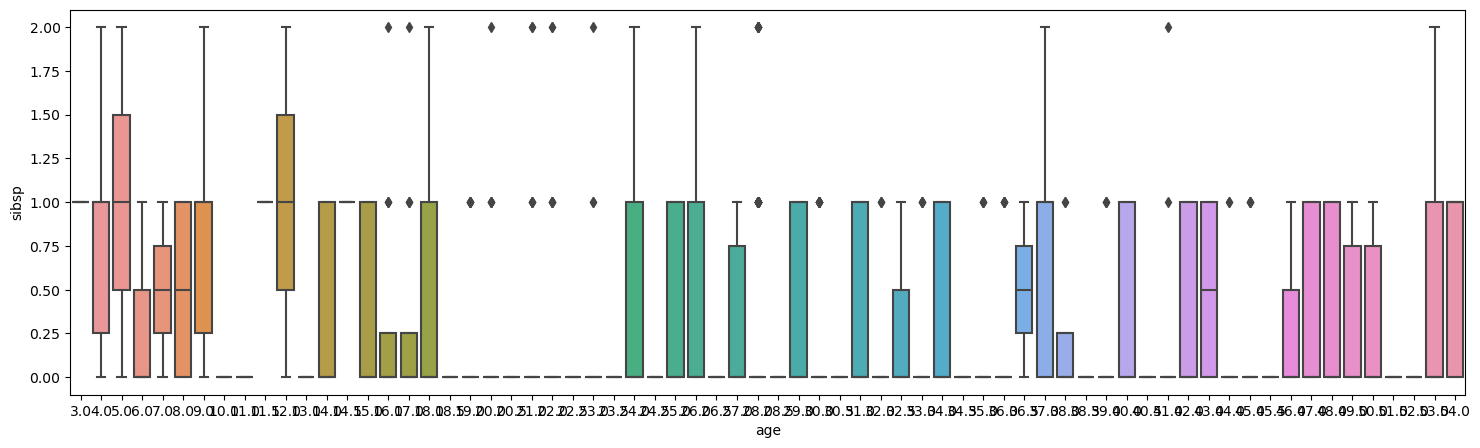

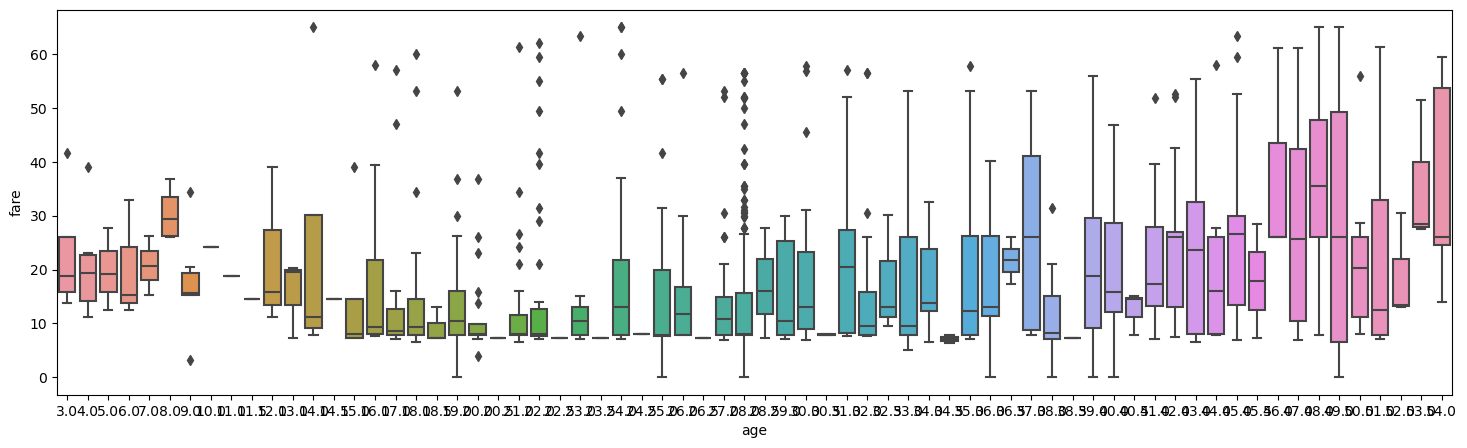

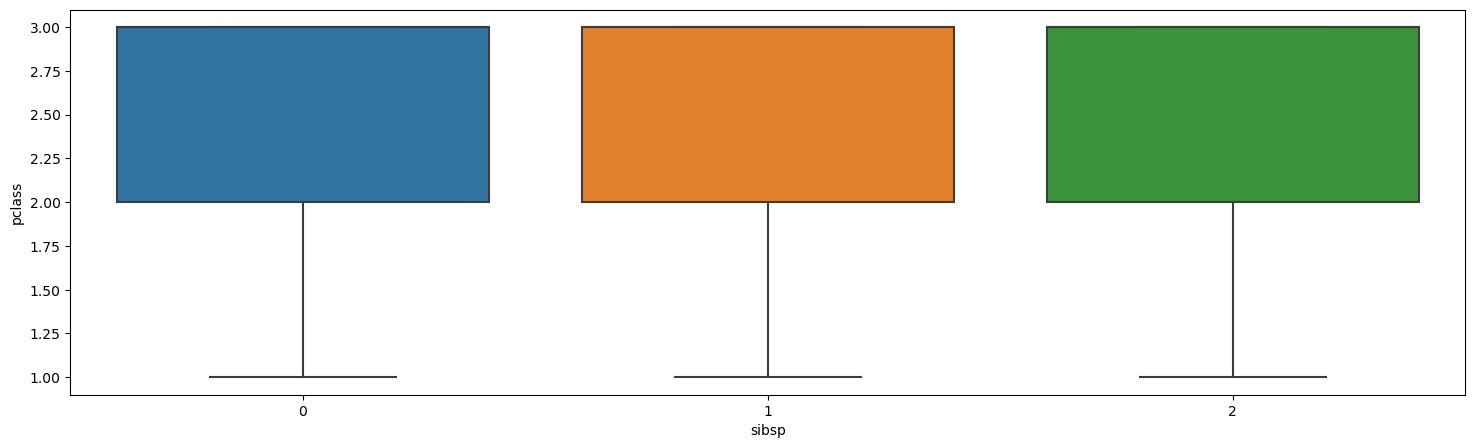

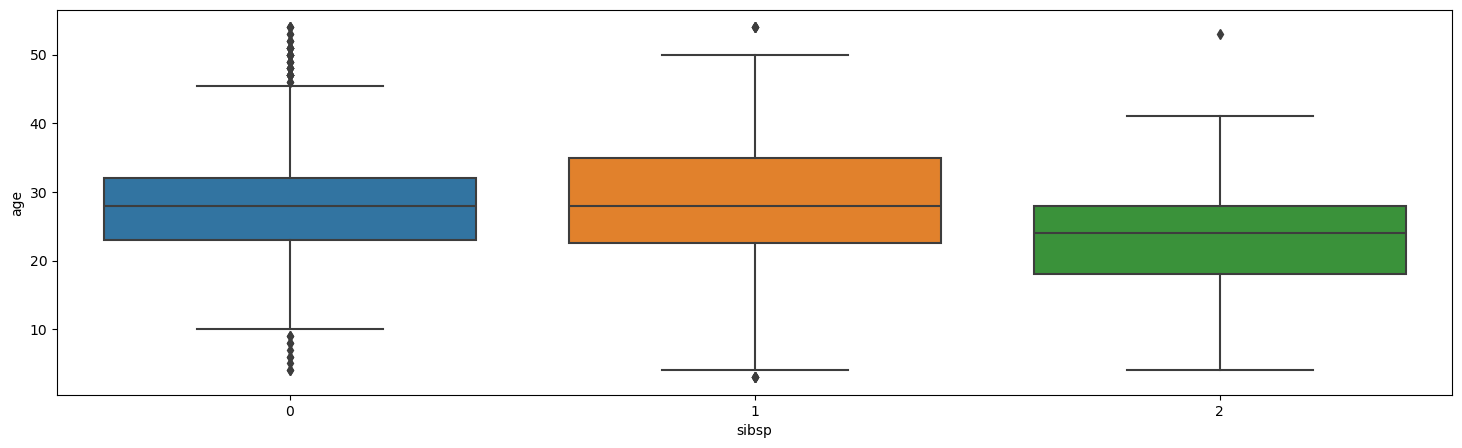

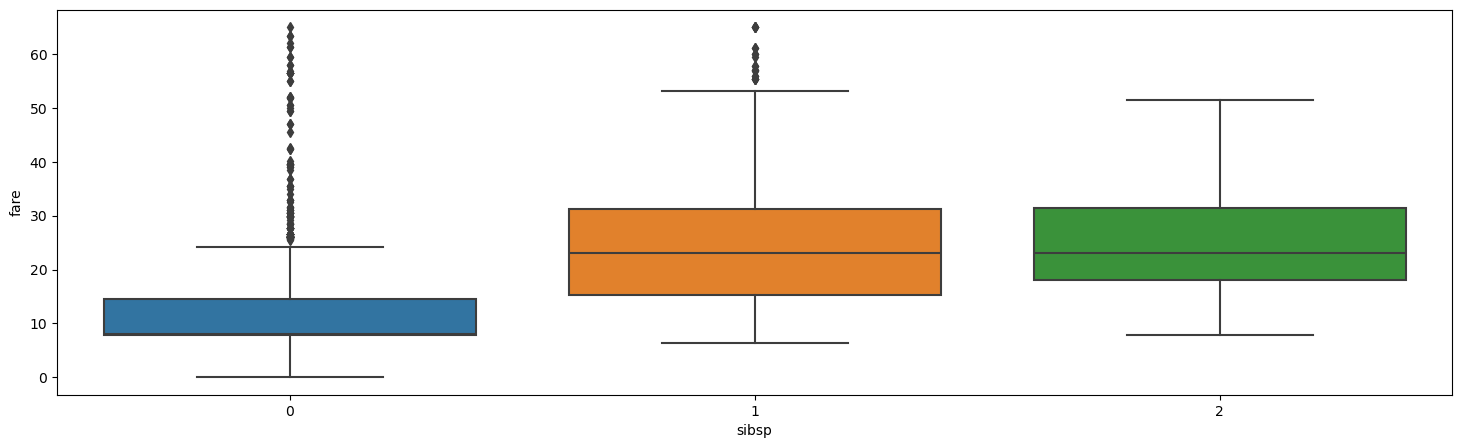

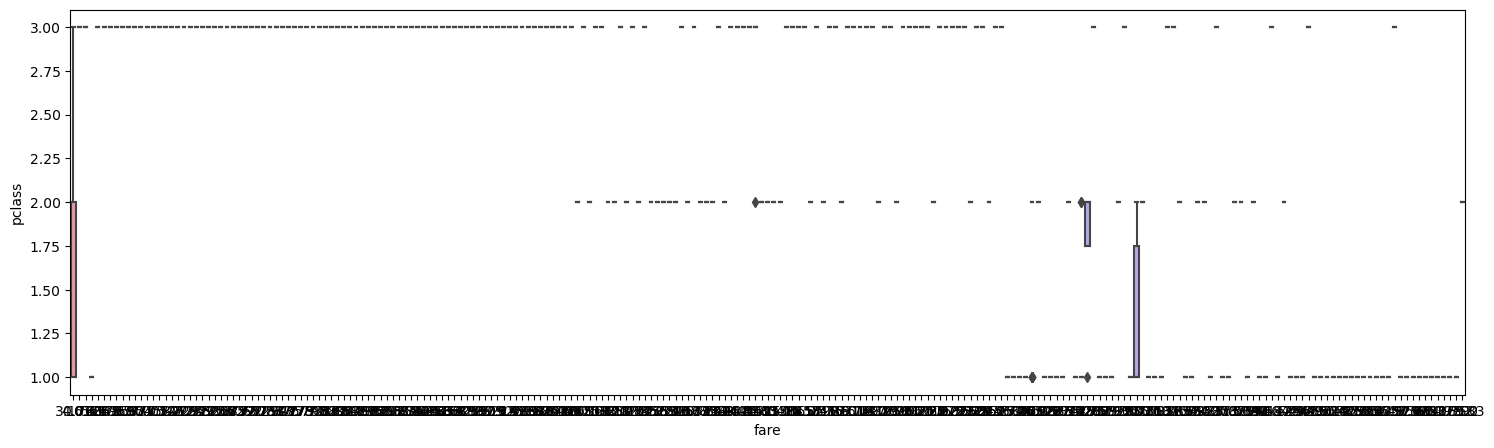

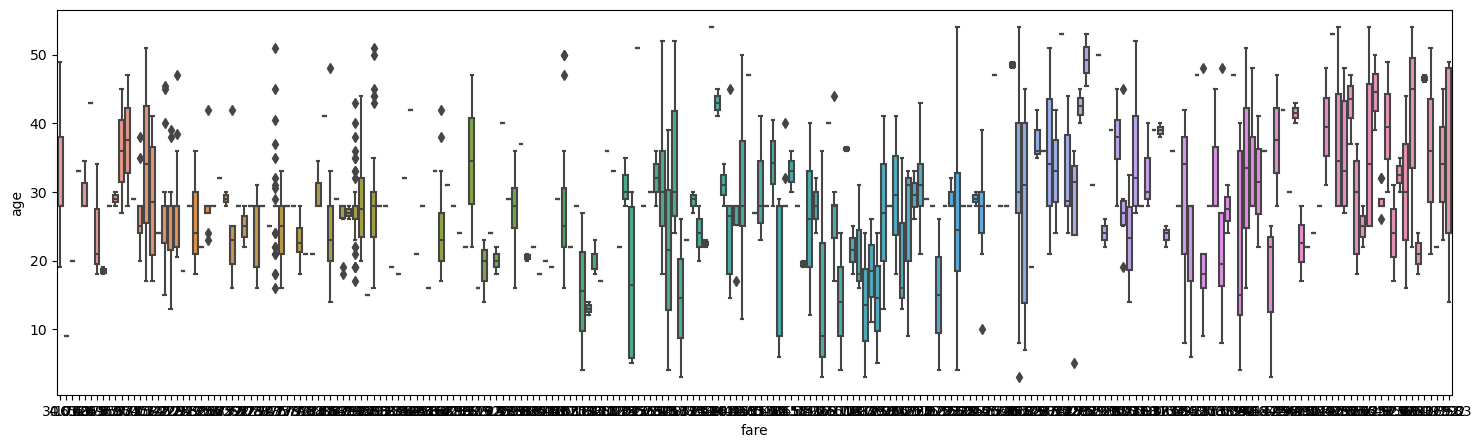

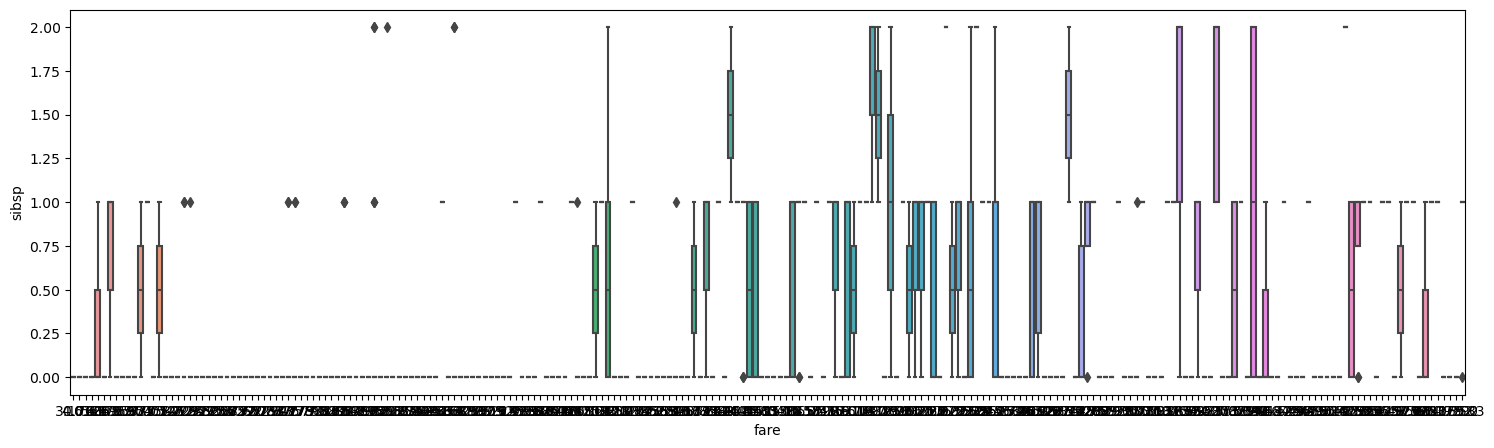

In [17]:
#Boxplots
for col1 in numeric_columns:
    for col2 in numeric_columns:
        if col1!=col2:
            plt.figure(figsize=(18, 5))
            sns.boxplot(x=col1, y=col2, data=df_cleaned)
            plt.show()

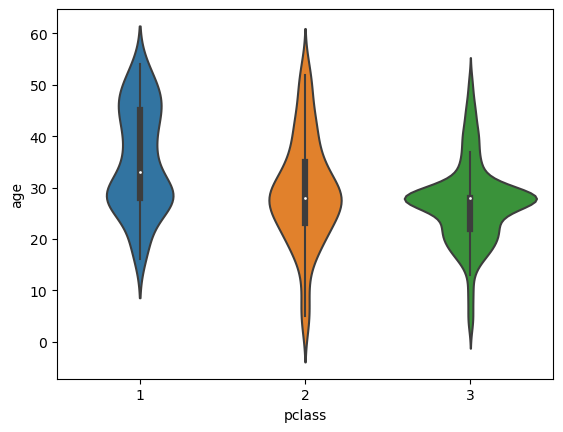

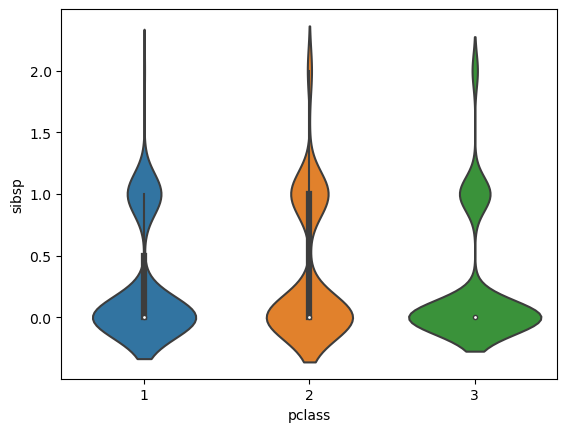

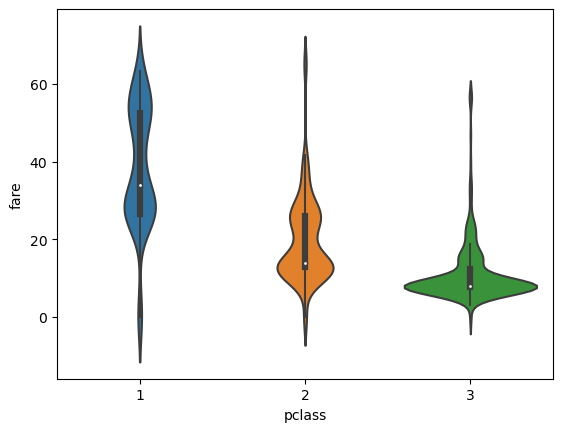

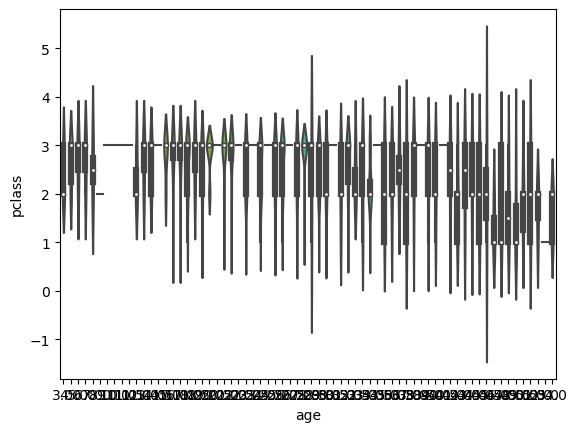

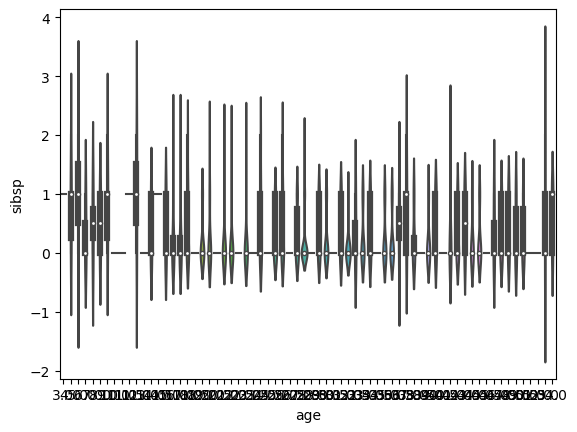

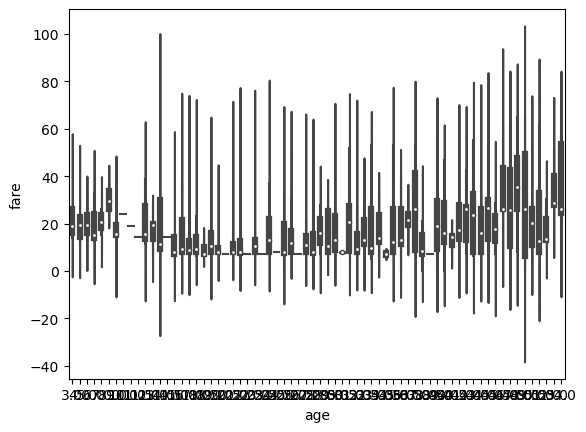

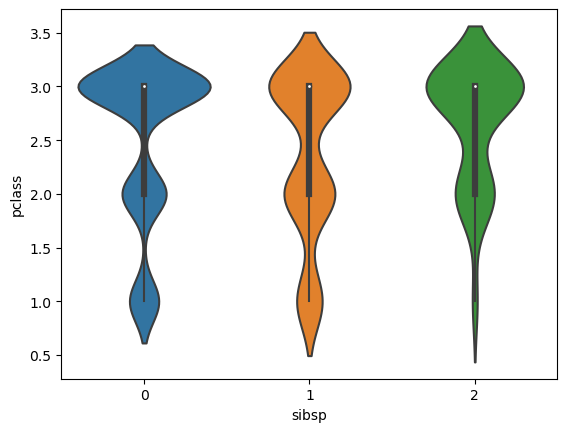

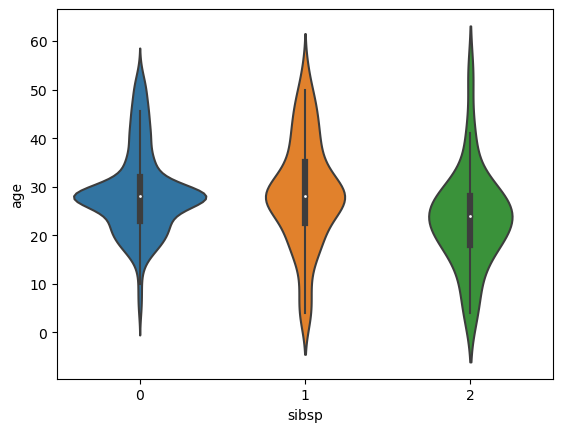

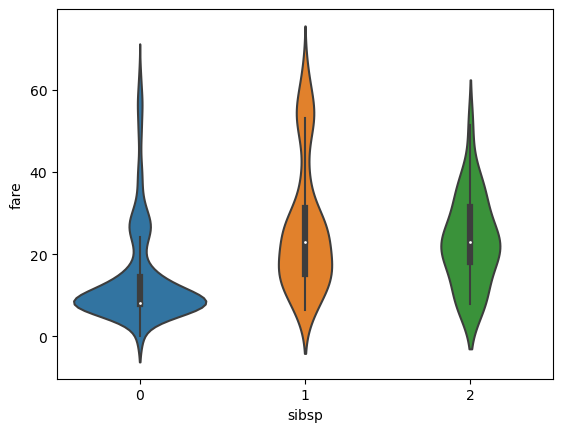

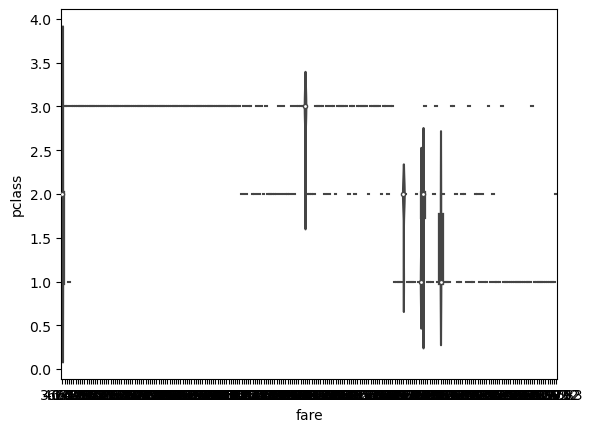

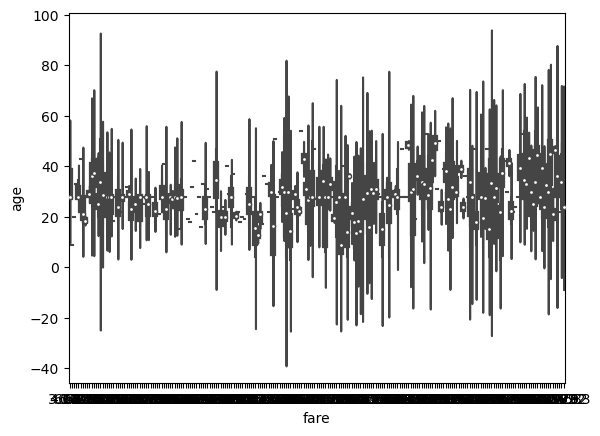

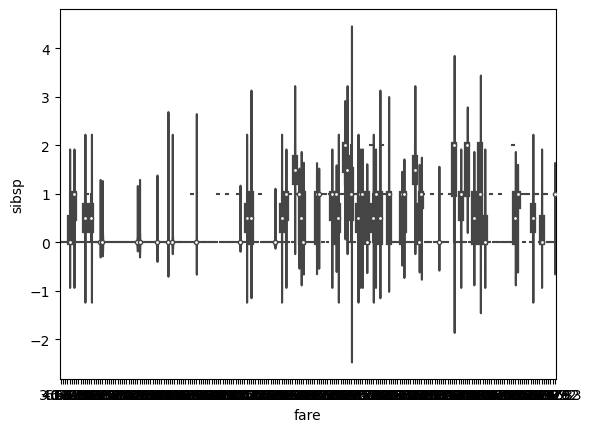

In [18]:
#Violinplots
for col1 in numeric_columns:
    for col2 in numeric_columns:
        if col1!=col2:
            sns.violinplot(x=col1, y=col2, data=df_cleaned)
            plt.show()

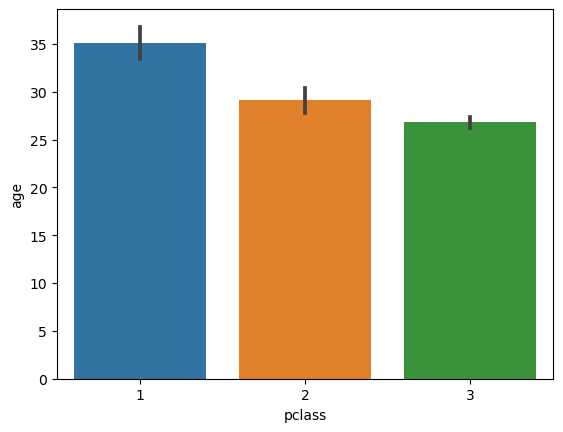

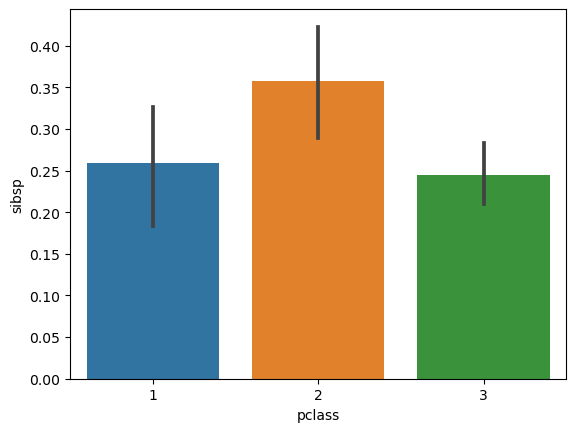

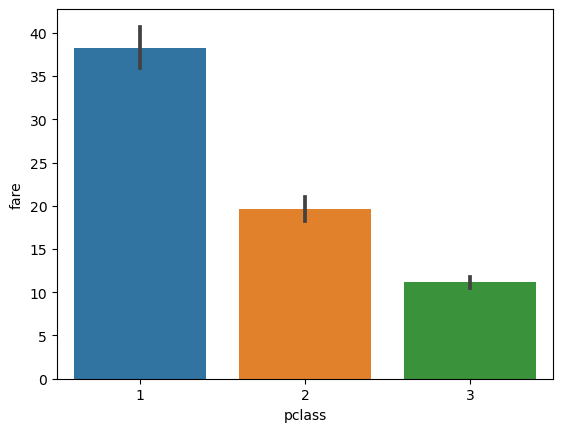

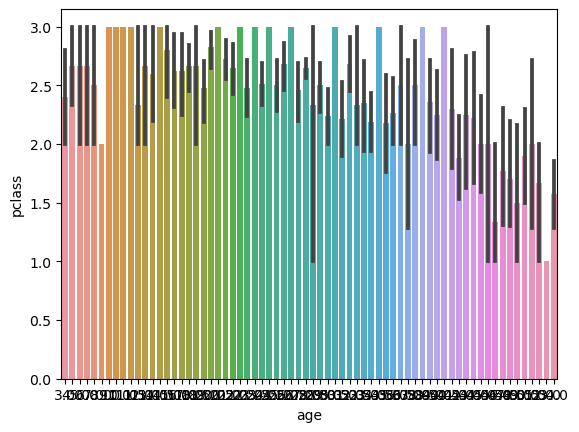

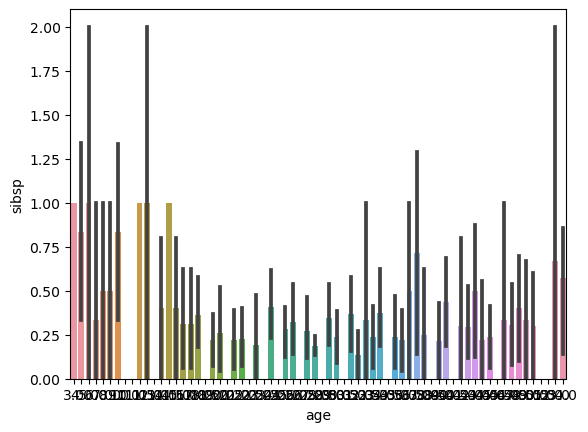

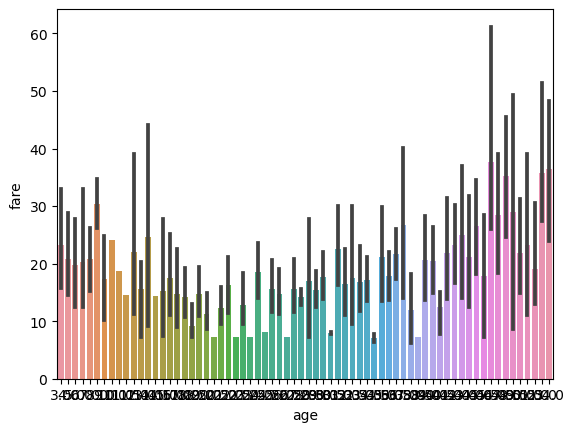

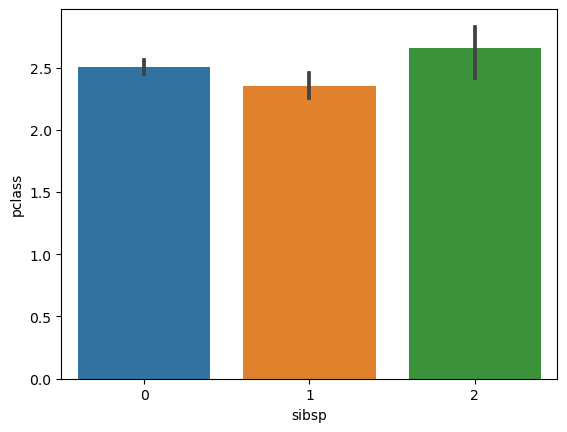

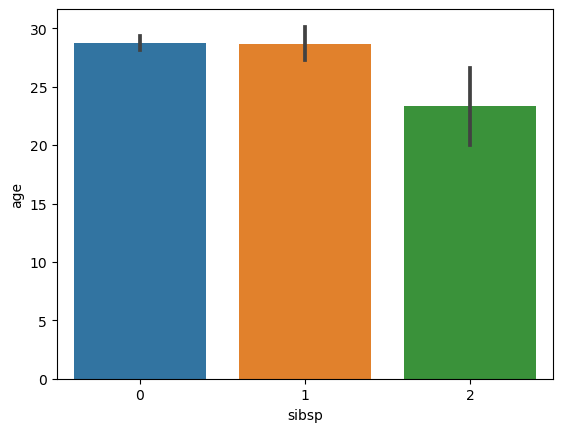

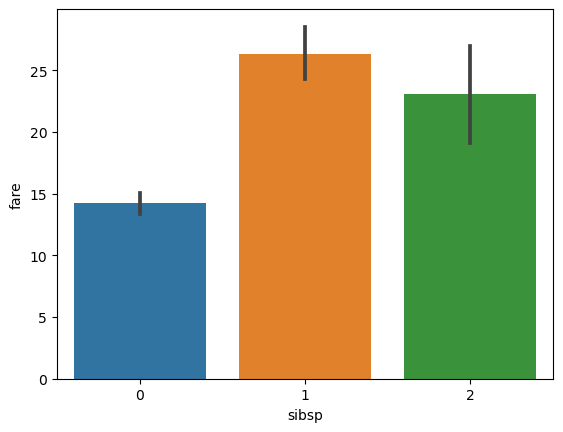

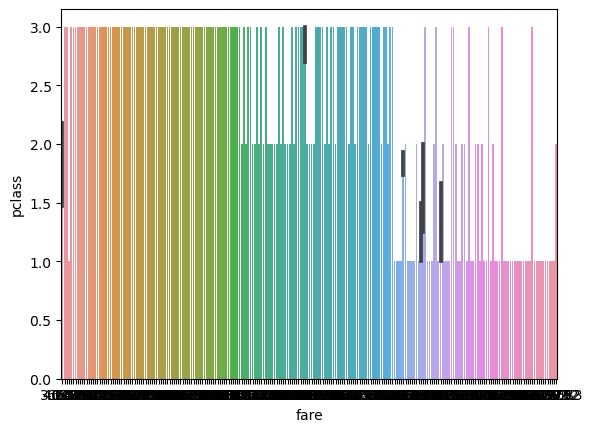

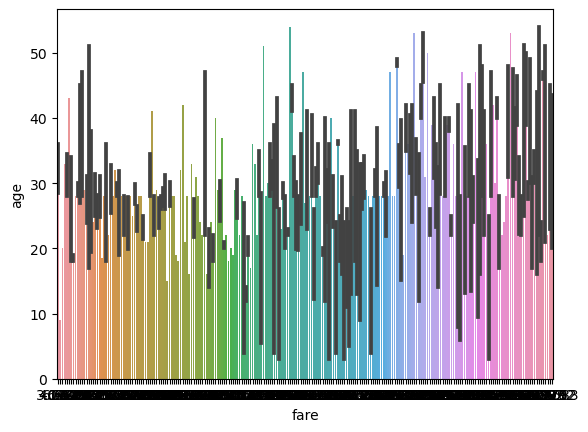

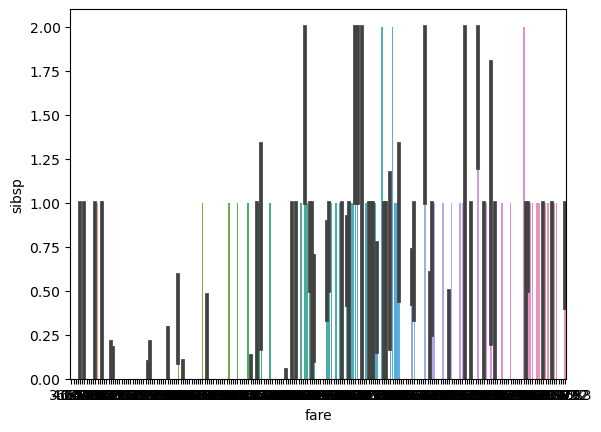

In [19]:
#Barplots
for col1 in numeric_columns:
    for col2 in numeric_columns:
        if col1!=col2:
            sns.barplot(x=col1, y=col2, data=df_cleaned)
            plt.show()

## Multivariate Analysis

C:\Users\HARSH GOYAL\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HARSH GOYAL\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HARSH GOYAL\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HARSH GOYAL\miniconda3\envs\ds_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

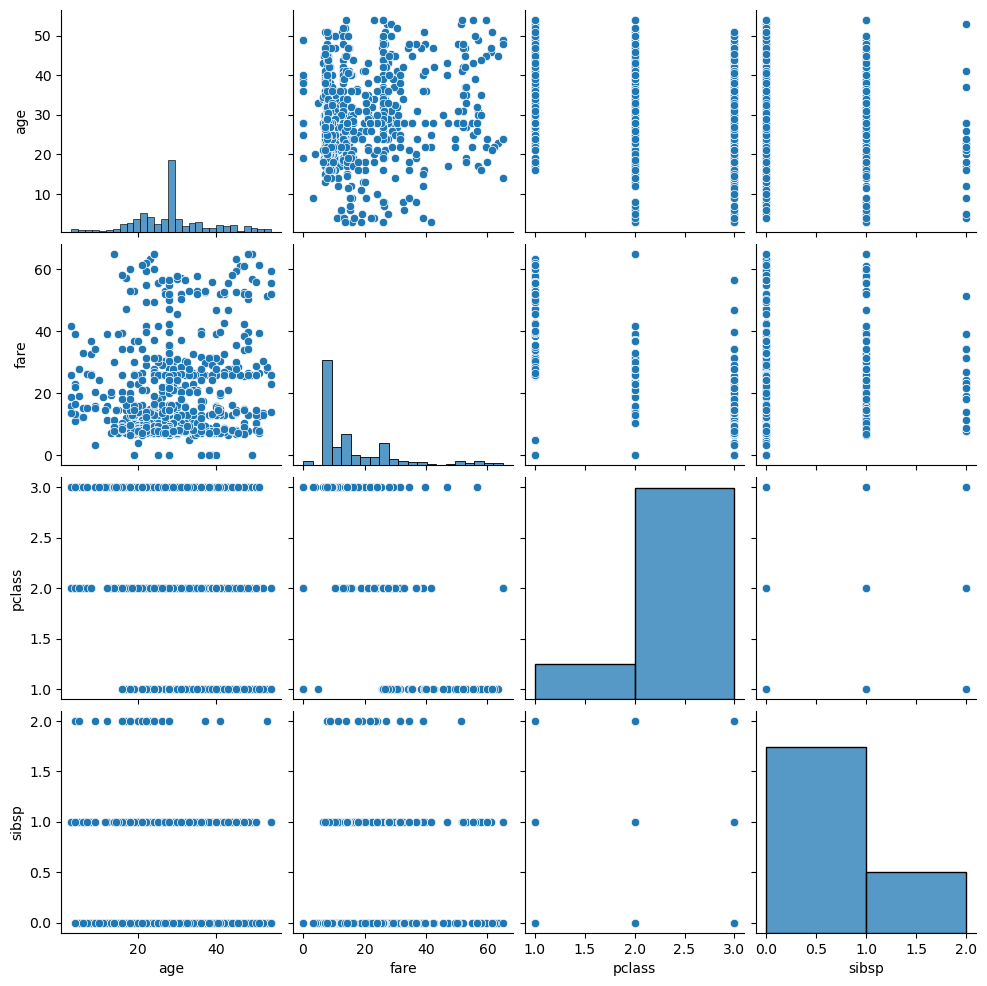

In [21]:
sns.pairplot(df_cleaned[['age', 'fare', 'pclass', 'sibsp']])
plt.show()

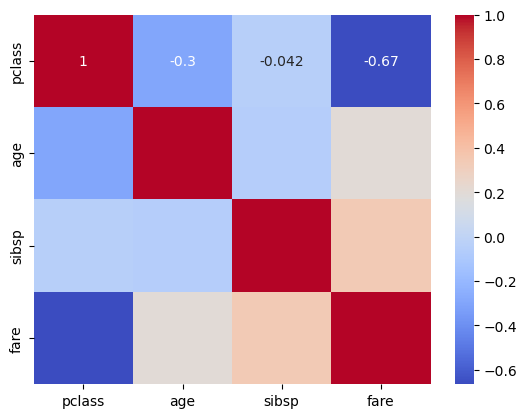

In [22]:
sns.heatmap(df_cleaned[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

C:\Users\HARSH GOYAL\miniconda3\envs\ds_env\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\HARSH GOYAL\miniconda3\envs\ds_env\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\HARSH GOYAL\miniconda3\envs\ds_env\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tru

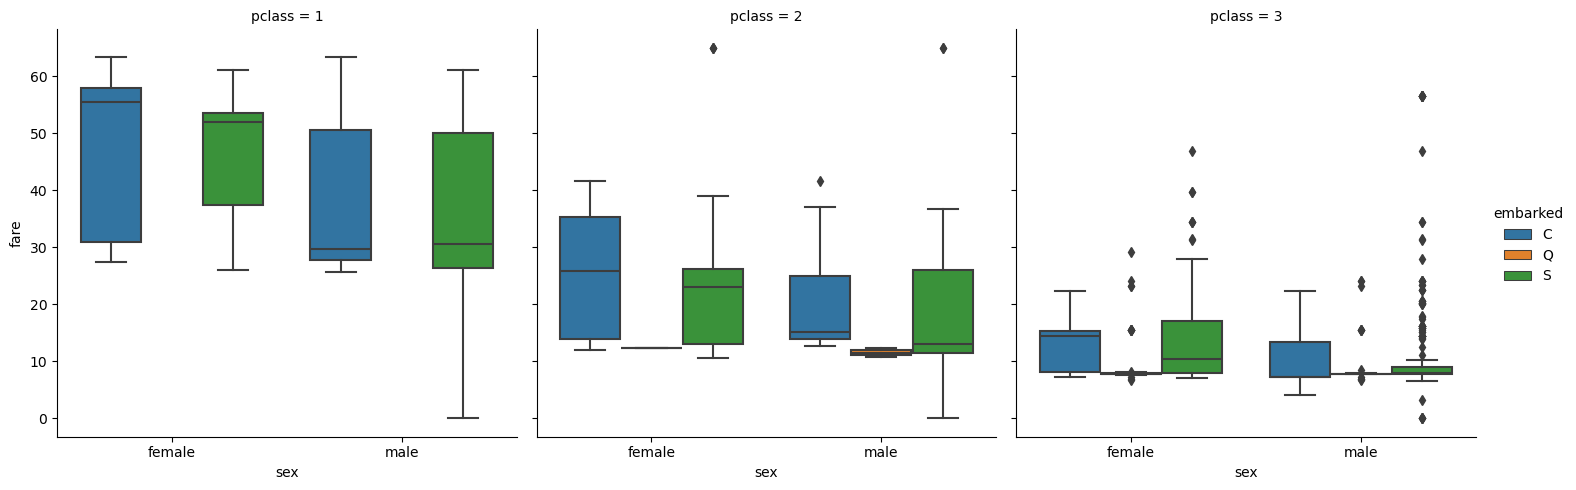

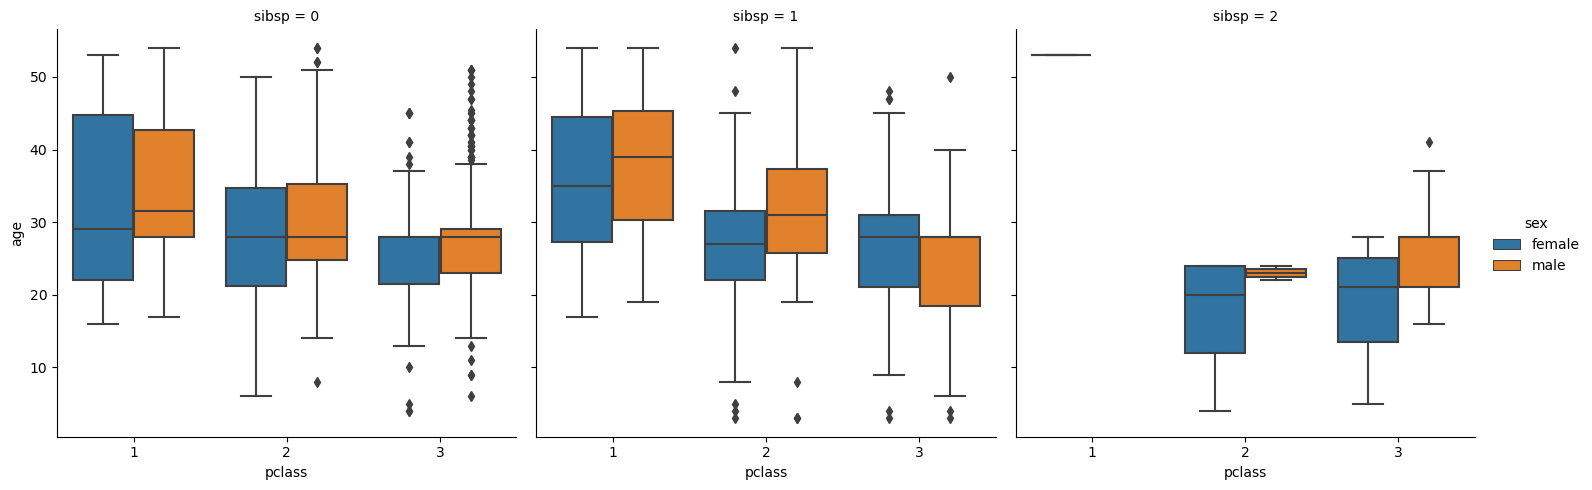

In [24]:
#Grouped comparisons
sns.catplot(x='sex', y='fare', hue='embarked', col='pclass', data=df_cleaned, kind='box')
plt.show()
sns.catplot(x='pclass', y='age', hue='sex', col='sibsp', data=df_cleaned, kind='box')
plt.show()